In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
import scipy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import BallTree
import optuna
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("cars_df.txt").dropna()
df

,Id,Name,Price,Color,Drive,Engine,Mileage,AccTime
0,427510,Skoda Octavia II Рестайлинг,899789,Белый,Передний,1.6,183399,12.3
1,429324,LADA (ВАЗ) Kalina II,689789,Черный,Передний,1.6,89267,11.0
2,441835,Skoda Kodiaq I,4899000,Черный,Полный,2.0,12,7.5
3,456094,KIA Sportage III,1135112,Серебряный,Передний,2.0,209641,10.4
5,388318,"Mercedes-Benz GLC Coupe 2016 – 2019, I (C253)",3219000,Белый,Полный,2.0,89890,6.5
...,...,...,...,...,...,...,...,...
715,459105,Audi A6 V (C8),6299000,Серый,Передний,2.0,5667,8.3
716,420058,KIA Rio IV,2249789,Белый,Передний,1.6,25000,11.6
718,422202,Volkswagen Tiguan II,3049789,Серый,Полный,1.4,83175,9.2
719,454112,LADA (ВАЗ) 2121 (4x4) I Рестайлинг (2020),979000,Серый,Полный,1.7,4050,17.0


In [3]:
df["Drive"].value_counts()

Передний    432
Полный      242
Задний       17
Name: Drive, dtype: int64

In [4]:
df = df.drop(columns=["Id"])

In [5]:
df

,Name,Price,Color,Drive,Engine,Mileage,AccTime
0,Skoda Octavia II Рестайлинг,899789,Белый,Передний,1.6,183399,12.3
1,LADA (ВАЗ) Kalina II,689789,Черный,Передний,1.6,89267,11.0
2,Skoda Kodiaq I,4899000,Черный,Полный,2.0,12,7.5
3,KIA Sportage III,1135112,Серебряный,Передний,2.0,209641,10.4
5,"Mercedes-Benz GLC Coupe 2016 – 2019, I (C253)",3219000,Белый,Полный,2.0,89890,6.5
...,...,...,...,...,...,...,...
715,Audi A6 V (C8),6299000,Серый,Передний,2.0,5667,8.3
716,KIA Rio IV,2249789,Белый,Передний,1.6,25000,11.6
718,Volkswagen Tiguan II,3049789,Серый,Полный,1.4,83175,9.2
719,LADA (ВАЗ) 2121 (4x4) I Рестайлинг (2020),979000,Серый,Полный,1.7,4050,17.0


In [6]:
df["brand"] = df["Name"].str.split().str[0]
df

,Name,Price,Color,Drive,Engine,Mileage,AccTime,brand
0,Skoda Octavia II Рестайлинг,899789,Белый,Передний,1.6,183399,12.3,Skoda
1,LADA (ВАЗ) Kalina II,689789,Черный,Передний,1.6,89267,11.0,LADA
2,Skoda Kodiaq I,4899000,Черный,Полный,2.0,12,7.5,Skoda
3,KIA Sportage III,1135112,Серебряный,Передний,2.0,209641,10.4,KIA
5,"Mercedes-Benz GLC Coupe 2016 – 2019, I (C253)",3219000,Белый,Полный,2.0,89890,6.5,Mercedes-Benz
...,...,...,...,...,...,...,...,...
715,Audi A6 V (C8),6299000,Серый,Передний,2.0,5667,8.3,Audi
716,KIA Rio IV,2249789,Белый,Передний,1.6,25000,11.6,KIA
718,Volkswagen Tiguan II,3049789,Серый,Полный,1.4,83175,9.2,Volkswagen
719,LADA (ВАЗ) 2121 (4x4) I Рестайлинг (2020),979000,Серый,Полный,1.7,4050,17.0,LADA


In [7]:
df = df.drop(columns=["Name"])
df

,Price,Color,Drive,Engine,Mileage,AccTime,brand
0,899789,Белый,Передний,1.6,183399,12.3,Skoda
1,689789,Черный,Передний,1.6,89267,11.0,LADA
2,4899000,Черный,Полный,2.0,12,7.5,Skoda
3,1135112,Серебряный,Передний,2.0,209641,10.4,KIA
5,3219000,Белый,Полный,2.0,89890,6.5,Mercedes-Benz
...,...,...,...,...,...,...,...
715,6299000,Серый,Передний,2.0,5667,8.3,Audi
716,2249789,Белый,Передний,1.6,25000,11.6,KIA
718,3049789,Серый,Полный,1.4,83175,9.2,Volkswagen
719,979000,Серый,Полный,1.7,4050,17.0,LADA


In [8]:
# df = pd.get_dummies(df, columns=["Color", "Drive", "brand"])
df = pd.get_dummies(df, columns=["Color", "brand"])
df

,Price,Drive,Engine,Mileage,AccTime,Color_Бежевый,Color_Белый,Color_Голубой,Color_Желтый,Color_Зеленый,...,brand_Porsche,brand_Renault,brand_Skoda,brand_SsangYong,brand_Subaru,brand_Suzuki,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_Vortex
0,899789,Передний,1.6,183399,12.3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,689789,Передний,1.6,89267,11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4899000,Полный,2.0,12,7.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1135112,Передний,2.0,209641,10.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3219000,Полный,2.0,89890,6.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,6299000,Передний,2.0,5667,8.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
716,2249789,Передний,1.6,25000,11.6,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
718,3049789,Полный,1.4,83175,9.2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
719,979000,Полный,1.7,4050,17.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train, validation = train_test_split(df, test_size=0.2)

In [10]:
scaler = preprocessing.StandardScaler()
validation_target = validation['Drive'].to_numpy()
validation_data = scaler.fit_transform(
        validation.drop(columns=["Drive"])
)
validation_target

array(['Передний', 'Передний', 'Передний', 'Передний', 'Полный',
       'Передний', 'Полный', 'Полный', 'Передний', 'Передний', 'Передний',
       'Полный', 'Передний', 'Передний', 'Полный', 'Передний', 'Передний',
       'Передний', 'Полный', 'Передний', 'Полный', 'Передний', 'Передний',
       'Полный', 'Передний', 'Полный', 'Передний', 'Полный', 'Передний',
       'Передний', 'Передний', 'Передний', 'Полный', 'Полный', 'Полный',
       'Передний', 'Полный', 'Полный', 'Полный', 'Полный', 'Передний',
       'Передний', 'Задний', 'Полный', 'Передний', 'Передний', 'Передний',
       'Передний', 'Задний', 'Передний', 'Полный', 'Полный', 'Передний',
       'Передний', 'Передний', 'Передний', 'Полный', 'Передний',
       'Передний', 'Передний', 'Полный', 'Передний', 'Передний',
       'Передний', 'Передний', 'Полный', 'Передний', 'Передний', 'Полный',
       'Передний', 'Полный', 'Полный', 'Передний', 'Передний', 'Передний',
       'Полный', 'Передний', 'Передний', 'Полный', 'Передний', 'П

In [11]:
def split(df):
    cur_train, cur_test = train_test_split(df, test_size=0.2)
    cur_train, cur_train_target = split_norm(cur_train)
    cur_test, cur_test_target = split_norm(cur_test)
    return cur_train, cur_train_target, cur_test, cur_test_target

def split_norm(df):
    df_target = df['Drive'].to_numpy()
    x = scaler.fit_transform(
        df.drop(columns=["Drive"])
    )
    return x, df_target

train

,Price,Drive,Engine,Mileage,AccTime,Color_Бежевый,Color_Белый,Color_Голубой,Color_Желтый,Color_Зеленый,...,brand_Porsche,brand_Renault,brand_Skoda,brand_SsangYong,brand_Subaru,brand_Suzuki,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_Vortex
75,3500000,Полный,2.0,76331,6.3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,1349789,Передний,1.4,154523,9.3,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
114,3090000,Полный,2.3,128933,7.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157,1380000,Передний,1.4,137939,9.3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
445,1569000,Передний,2.0,88000,10.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,4100000,Задний,1.6,50317,8.4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,2253000,Передний,1.6,95,12.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,998000,Передний,2.0,200000,10.7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547,810000,Передний,1.6,145000,11.9,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
class KNN:

    def __init__(self, metric, kernel, alg, k, lowess=False):
        self.metric = metric
        self.kernel = kernel
        self.alg = alg
        self.k = k
        self.lowess = lowess

        self.tree = None
        self.train_data = None

    def fit(self, train_data):
        self.tree = BallTree(train_data.copy(), leaf_size=2,
                             metric=self.metric)  ## todo leaf size is also a hyper param
        self.train_data = train_data

    def calc_dist(self, point, k):
        if self.lowess:
            distances, _ = self.tree.query([point.copy()], k=k + 1)
            return distances[0][-1]
        else:
            distances, _ = self.tree.query([point.copy()], k=k)
            return distances[0][-1]

    def reg(self, point, values, weights=None):
        assert len(self.train_data) == len(values)

        h = self.k
        if self.alg == "not fixed":
            h = self.calc_dist(point.copy(), self.k + 1)

        if weights is None:
            weights = np.ones(len(self.train_data))

        numerator = 0
        denominator = 0

        excluded = False
        for i in range(len(self.train_data)):
            row = self.train_data[i]
            value = values[i]

            if np.array_equal(row, point) and not excluded:
                excluded = True
                continue

            kernel_value = self.calc_kernel(point, row, h)

            numerator += value * kernel_value * weights[i]
            denominator += kernel_value

        if denominator == 0:
            nearest_index = self.nearest(point)
            return values[nearest_index]

        return numerator / denominator

    def nearest(self, point):
        _, indices = self.tree.query([point.copy()], k=1)
        return indices[0][0]

    def classification(self, point, labels, weights=None):
        assert len(self.train_data) == len(labels)

        if weights is None:
            weights = np.ones(len(self.train_data))

        h = self.k
        if self.alg == "not fixed":
            h = self.calc_dist(point.copy(), self.k + 1)

        res = dict()
        excluded = False
        for i in range(len(self.train_data)):
            row = self.train_data[i]
            label = labels[i]

            if self.lowess and np.array_equal(row, point) and not excluded:
                excluded = True
                continue

            kernel_value = self.calc_kernel(point, row, h)

            res[label] = res.get(label, 0) + kernel_value * weights[i]

        if len(res) == 0:  
            raise ValueError("radius is not big enough")

        return max(res, key=res.get)

    def calc_kernel(self, point, row, h):
        return self.kernel(
            self.metric(point, row) / h
        )

    def onehot(self, labels):
        labels = [[x] for x in labels]
        return np.array(
            OneHotEncoder().fit_transform(labels).toarray()
        ).T

    def predict(self, values, test_data, weights=None):
        result = []
        for row in test_data:
            value = knn.reg(row, values, weights=weights)
            result.append(value)
        return np.array(result)

In [13]:
def uniform_kernel(x):
    return np.where(np.abs(x) < 1, 0.5, 0)


def gaussian_kernel(x):
    return scipy.stats.norm.pdf(x)


def triangular_kernel(x):
    return np.where(np.abs(x) < 1, 1 - np.abs(x), 0)

def epanechinkov_kernel(x):
    return np.where(np.abs(x) < 1, 0.75 * (1 - x ** 2), 0)
                    

kernels = {
    "uniform": uniform_kernel,
    "gaussian": gaussian_kernel,
    "triangular": triangular_kernel,
    "epanechinkov": epanechinkov_kernel
}
kernels

{'uniform': <function __main__.uniform_kernel(x)>,
 'gaussian': <function __main__.gaussian_kernel(x)>,
 'triangular': <function __main__.triangular_kernel(x)>,
 'epanechinkov': <function __main__.epanechinkov_kernel(x)>}

In [14]:
kernel_names = list(kernels.keys())
kernel_names

['uniform', 'gaussian', 'triangular', 'epanechinkov']

In [15]:
def cosine_metric(x, y):
    return scipy.spatial.distance.cosine(x, y)


def chebyshev_metric(x, y):
    return scipy.spatial.distance.chebyshev(x, y)

minkowski_metric = lambda p: lambda x, y: scipy.spatial.distance.minkowski(x, y, p=p)

metrics = {
    "cosine": cosine_metric,
    "minkowski": minkowski_metric,
    "chebyshev": chebyshev_metric
}

In [16]:
metric_names = list(metrics.keys())
metric_names

['cosine', 'minkowski', 'chebyshev']

In [17]:
def get_predicted_classification(metric, 
              kernel, 
              alg_type, 
              k, 
              train_data,
              train_target,
              test_data
             ):
    knn = KNN(metric=metric, kernel=kernel, alg=alg_type, k=k)
    knn.fit(train_data)
    res = [knn.classification(test_row, train_target) for test_row in test_data]
    return np.array(res)
    

In [18]:
def get_predicted_lib(metric, 
              kernel, 
              alg_type, 
              k, 
              train_data,
              train_target,
              test_data
             ):
    
    knn = None
    if alg_type == "fixed":
        knn = RadiusNeighborsClassifier(radius=k, metric=metric)
    else:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(train_data, train_target)
    return knn.predict(test_data)

In [19]:
alg_types = ["fixed", "not fixed"]


def cross_validation_split(data, d):
    n = len(data)
    fold_size = n // d
    cv_data = []
    
    for i in range(d):
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size if i < (d - 1) else n
        
        valid_data = data.iloc[start_idx:end_idx]

        train_data = pd.concat(
            [data.iloc[:start_idx], data.iloc[end_idx:]],
            ignore_index=True)
        
        cv_data.append((train_data, valid_data))
    
    return cv_data


def abstract_objective(trial, predict_func, score_func, error_value):

    metric_name = trial.suggest_categorical("metric", metric_names)
    kernel_name = trial.suggest_categorical("kernel", kernel_names)
    alg_type = trial.suggest_categorical("alg type", alg_types)

    metric = metrics[metric_name]
    if metric_name == "minkowski":
        p = trial.suggest_int("p", 1, 10) # wider range
        metric = metric(p)
        
    k = 0
    if alg_type == "fixed": # by radius
        k = trial.suggest_float("radius", 1e-4, 1e4, log=True)
    else: # by number of neighbours
        k = trial.suggest_int("neighbours", 1, 100)
        
    kernel = kernels[kernel_name]
        
    d = 4
    mean = 0
    
#     train = train.sample(frac=1)
    
    cv = cross_validation_split(train.sample(frac=1), d)
    for (train_data, valid_data) in cv:
        new_train, new_train_target = split_norm(train_data)
        test, test_target = split_norm(valid_data)
        
        try:
            predicted = predict_func(
                metric, 
                kernel, 
                alg_type, 
                k, 
                new_train,
                new_train_target,
                test
            )  
            acc = score_func(predicted, test_target)
        except ValueError as inst:
#             print(inst)
            raise optuna.TrialPruned()
        mean += acc
        
    return mean / d


def objective(trial):
    return abstract_objective(trial, get_predicted_classification, accuracy_score, 0)
    
def objective_lib(trial):
    return abstract_objective(trial, get_predicted_lib, accuracy_score, 0)

In [20]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_trial)
print(study.best_params)

[I 2024-03-14 09:57:12,532] A new study created in memory with name: no-name-65b58eba-71a7-47d6-83a6-8b507398fcd4
[I 2024-03-14 09:57:16,222] Trial 0 finished with value: 0.552536231884058 and parameters: {'metric': 'minkowski', 'kernel': 'epanechinkov', 'alg type': 'fixed', 'p': 7, 'radius': 0.05967579597464189}. Best is trial 0 with value: 0.552536231884058.
[I 2024-03-14 09:57:28,971] Trial 1 finished with value: 0.6304347826086956 and parameters: {'metric': 'minkowski', 'kernel': 'gaussian', 'alg type': 'fixed', 'p': 2, 'radius': 2027.79401714594}. Best is trial 1 with value: 0.6304347826086956.
[I 2024-03-14 09:57:34,525] Trial 2 finished with value: 0.6304347826086957 and parameters: {'metric': 'cosine', 'kernel': 'uniform', 'alg type': 'fixed', 'radius': 0.00035999723025883997}. Best is trial 2 with value: 0.6304347826086957.
[I 2024-03-14 09:57:38,847] Trial 3 finished with value: 0.6920289855072463 and parameters: {'metric': 'chebyshev', 'kernel': 'triangular', 'alg type': 'no

[I 2024-03-14 10:03:12,713] Trial 35 finished with value: 0.7481884057971013 and parameters: {'metric': 'cosine', 'kernel': 'triangular', 'alg type': 'not fixed', 'neighbours': 35}. Best is trial 32 with value: 0.7608695652173912.
[I 2024-03-14 10:03:28,793] Trial 36 finished with value: 0.6304347826086957 and parameters: {'metric': 'cosine', 'kernel': 'gaussian', 'alg type': 'fixed', 'radius': 6218.580959805741}. Best is trial 32 with value: 0.7608695652173912.
[I 2024-03-14 10:03:35,959] Trial 37 finished with value: 0.7228260869565216 and parameters: {'metric': 'minkowski', 'kernel': 'triangular', 'alg type': 'not fixed', 'p': 4, 'neighbours': 21}. Best is trial 32 with value: 0.7608695652173912.
[I 2024-03-14 10:03:40,123] Trial 38 finished with value: 0.7173913043478262 and parameters: {'metric': 'chebyshev', 'kernel': 'epanechinkov', 'alg type': 'not fixed', 'neighbours': 40}. Best is trial 32 with value: 0.7608695652173912.
[I 2024-03-14 10:03:45,936] Trial 39 finished with valu

FrozenTrial(number=32, state=TrialState.COMPLETE, values=[0.7608695652173912], datetime_start=datetime.datetime(2024, 3, 14, 10, 2, 29, 336153), datetime_complete=datetime.datetime(2024, 3, 14, 10, 2, 41, 980880), params={'metric': 'cosine', 'kernel': 'triangular', 'alg type': 'not fixed', 'neighbours': 51}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'metric': CategoricalDistribution(choices=('cosine', 'minkowski', 'chebyshev')), 'kernel': CategoricalDistribution(choices=('uniform', 'gaussian', 'triangular', 'epanechinkov')), 'alg type': CategoricalDistribution(choices=('fixed', 'not fixed')), 'neighbours': IntDistribution(high=100, log=False, low=1, step=1)}, trial_id=32, value=None)
{'metric': 'cosine', 'kernel': 'triangular', 'alg type': 'not fixed', 'neighbours': 51}


In [22]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_lib, n_trials=50)
print(study.best_trial)
print(study.best_params)

[I 2024-03-14 12:01:35,944] A new study created in memory with name: no-name-68488ee0-04b7-438b-9076-82e1a012075a
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value o

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
[I 2024-03-14 12:03:15,051] Trial 30 finished with value: 0.6630434782608696 and parameters: {'metric': 'minkowski', 'kernel': 'gaussian', 'alg type': 'not fixed', 'p': 5, 'neighbours': 34}. Best is trial 10 with value: 0.75.
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `m

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
[I 2024-03-14 12:03:59,932] Trial 42 finished with value: 0.7228260869565217 and parameters: {'metric': 'cosine', 'kernel': 'gaussian', 'alg type': 'not fixed', 'neighbours': 63}. Best is trial 10 with value: 0.75.
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typica

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

FrozenTrial(number=10, state=TrialState.COMPLETE, values=[0.75], datetime_start=datetime.datetime(2024, 3, 14, 12, 1, 55, 544756), datetime_complete=datetime.datetime(2024, 3, 14, 12, 1, 59, 897111), params={'metric': 'cosine', 'kernel': 'gaussian', 'alg type': 'not fixed', 'neighbours': 38}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'metric': CategoricalDistribution(choices=('cosine', 'minkowski', 'chebyshev')), 'kernel': CategoricalDistribution(choices=('uniform', 'gaussian', 'triangular', 'epanechinkov')), 'alg type': CategoricalDistribution(choices=('fixed', 'not fixed')), 'neighbours': IntDistribution(high=100, log=False, low=1, step=1)}, trial_id=10, value=None)
{'metric': 'cosine', 'kernel': 'gaussian', 'alg type': 'not fixed', 'neighbours': 38}


In [63]:
validation_target.shape

(139,)

In [31]:
max_n = 70
new_train, new_train_target, test, test_target = split(train)
accuracies = []
for k in range(1, max_n):
    predicted = get_predicted_classification(
        metric=cosine_metric, 
        kernel=triangular_kernel, 
        alg_type="not fixed", 
        k=k, 
        train_data=new_train,
        train_target=new_train_target,
        test_data=validation_data
    )
    acc = accuracy_score(predicted, validation_target)    
    accuracies.append(acc)

In [35]:
accuracies[38]

0.7482014388489209

In [33]:
accuracies_lib = []
for k in range(1, max_n):
    predicted = get_predicted_lib(
        metric=cosine_metric, 
        kernel=triangular_kernel, 
        alg_type="not fixed", 
        k=k, 
        train_data=new_train,
        train_target=new_train_target,
        test_data=validation_data
    )
    acc = accuracy_score(predicted, validation_target)    
    accuracies_lib.append(acc)
accuracies_lib    

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zaharpanteleev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

[0.7410071942446043,
 0.697841726618705,
 0.7266187050359713,
 0.7266187050359713,
 0.7338129496402878,
 0.7410071942446043,
 0.762589928057554,
 0.762589928057554,
 0.762589928057554,
 0.7553956834532374,
 0.7410071942446043,
 0.7482014388489209,
 0.7482014388489209,
 0.7410071942446043,
 0.7338129496402878,
 0.7410071942446043,
 0.762589928057554,
 0.762589928057554,
 0.762589928057554,
 0.7553956834532374,
 0.7482014388489209,
 0.7482014388489209,
 0.7482014388489209,
 0.7553956834532374,
 0.7482014388489209,
 0.7410071942446043,
 0.7266187050359713,
 0.7482014388489209,
 0.7266187050359713,
 0.7482014388489209,
 0.7482014388489209,
 0.7553956834532374,
 0.7482014388489209,
 0.7553956834532374,
 0.7553956834532374,
 0.762589928057554,
 0.7553956834532374,
 0.762589928057554,
 0.7697841726618705,
 0.7769784172661871,
 0.7697841726618705,
 0.7769784172661871,
 0.7769784172661871,
 0.762589928057554,
 0.762589928057554,
 0.7697841726618705,
 0.7553956834532374,
 0.7553956834532374,
 0.

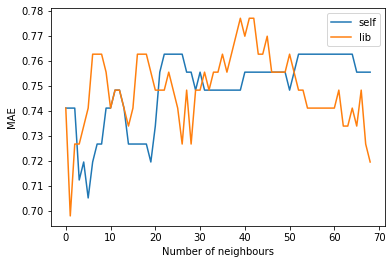

In [34]:
import matplotlib.pyplot as plt
plt.plot(accuracies, label="self")
plt.plot(accuracies_lib, label="lib")
plt.xlabel('Number of neighbours')
plt.ylabel('MAE')
plt.legend(loc="upper right")
plt.show()

In [37]:
price_df = pd.read_csv("cars_df.txt").dropna()
price_df

,Id,Name,Price,Color,Drive,Engine,Mileage,AccTime
0,427510,Skoda Octavia II Рестайлинг,899789,Белый,Передний,1.6,183399,12.3
1,429324,LADA (ВАЗ) Kalina II,689789,Черный,Передний,1.6,89267,11.0
2,441835,Skoda Kodiaq I,4899000,Черный,Полный,2.0,12,7.5
3,456094,KIA Sportage III,1135112,Серебряный,Передний,2.0,209641,10.4
5,388318,"Mercedes-Benz GLC Coupe 2016 – 2019, I (C253)",3219000,Белый,Полный,2.0,89890,6.5
...,...,...,...,...,...,...,...,...
715,459105,Audi A6 V (C8),6299000,Серый,Передний,2.0,5667,8.3
716,420058,KIA Rio IV,2249789,Белый,Передний,1.6,25000,11.6
718,422202,Volkswagen Tiguan II,3049789,Серый,Полный,1.4,83175,9.2
719,454112,LADA (ВАЗ) 2121 (4x4) I Рестайлинг (2020),979000,Серый,Полный,1.7,4050,17.0


In [38]:
price_df = price_df.drop(columns=["Id"])
price_df

,Name,Price,Color,Drive,Engine,Mileage,AccTime
0,Skoda Octavia II Рестайлинг,899789,Белый,Передний,1.6,183399,12.3
1,LADA (ВАЗ) Kalina II,689789,Черный,Передний,1.6,89267,11.0
2,Skoda Kodiaq I,4899000,Черный,Полный,2.0,12,7.5
3,KIA Sportage III,1135112,Серебряный,Передний,2.0,209641,10.4
5,"Mercedes-Benz GLC Coupe 2016 – 2019, I (C253)",3219000,Белый,Полный,2.0,89890,6.5
...,...,...,...,...,...,...,...
715,Audi A6 V (C8),6299000,Серый,Передний,2.0,5667,8.3
716,KIA Rio IV,2249789,Белый,Передний,1.6,25000,11.6
718,Volkswagen Tiguan II,3049789,Серый,Полный,1.4,83175,9.2
719,LADA (ВАЗ) 2121 (4x4) I Рестайлинг (2020),979000,Серый,Полный,1.7,4050,17.0


In [39]:
price_df["brand"] = price_df["Name"].str.split().str[0]
price_df

,Name,Price,Color,Drive,Engine,Mileage,AccTime,brand
0,Skoda Octavia II Рестайлинг,899789,Белый,Передний,1.6,183399,12.3,Skoda
1,LADA (ВАЗ) Kalina II,689789,Черный,Передний,1.6,89267,11.0,LADA
2,Skoda Kodiaq I,4899000,Черный,Полный,2.0,12,7.5,Skoda
3,KIA Sportage III,1135112,Серебряный,Передний,2.0,209641,10.4,KIA
5,"Mercedes-Benz GLC Coupe 2016 – 2019, I (C253)",3219000,Белый,Полный,2.0,89890,6.5,Mercedes-Benz
...,...,...,...,...,...,...,...,...
715,Audi A6 V (C8),6299000,Серый,Передний,2.0,5667,8.3,Audi
716,KIA Rio IV,2249789,Белый,Передний,1.6,25000,11.6,KIA
718,Volkswagen Tiguan II,3049789,Серый,Полный,1.4,83175,9.2,Volkswagen
719,LADA (ВАЗ) 2121 (4x4) I Рестайлинг (2020),979000,Серый,Полный,1.7,4050,17.0,LADA


In [40]:
price_df = price_df.drop(columns=["Name"])
price_df = pd.get_dummies(price_df, columns=["Color", "Drive", "brand"])
price_df

,Price,Engine,Mileage,AccTime,Color_Бежевый,Color_Белый,Color_Голубой,Color_Желтый,Color_Зеленый,Color_Золотой,...,brand_Porsche,brand_Renault,brand_Skoda,brand_SsangYong,brand_Subaru,brand_Suzuki,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_Vortex
0,899789,1.6,183399,12.3,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,689789,1.6,89267,11.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4899000,2.0,12,7.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1135112,2.0,209641,10.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3219000,2.0,89890,6.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,6299000,2.0,5667,8.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
716,2249789,1.6,25000,11.6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
718,3049789,1.4,83175,9.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
719,979000,1.7,4050,17.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train, validation = train_test_split(price_df, test_size=0.3)

def split_norm(df):
    df_target = scaler.fit_transform(
        [[x] for x in df["Price"].to_numpy()]
    )
    x = scaler.fit_transform(
        df.drop(columns=["Price"])
    )
    return x, df_target

In [43]:
train_data, train_price = split_norm(train)
valid_data, valid_price = split_norm(validation)

In [44]:
def get_predicted_lowess_full(
    metric, 
    kernel, 
    alg_type, 
    k, 
    train_data,
    train_target,
    test_data
):
    
    knn = KNN(metric=metric, kernel=kernel, alg=alg_type, k=k, lowess=True)
    knn.fit(train_data)    
    res = [knn.reg(train_row, train_target) for train_row in train_data]
    predicted_price = np.array(res)
    
    test_price = [knn.reg(test_row, train_target) for test_row in test_data]
    
    weights = kernel(train_target - predicted_price)
    
    knn = KNN(metric=metric, kernel=kernel, alg=alg_type, k=k)
    knn.fit(train_data)
    res = [knn.reg(test_row, train_target) for test_row in test_data]
    price = np.array(res)
    return test_price, price, weights

def get_predicted_lowess(
    metric, 
    kernel, 
    alg_type, 
    k, 
    train_data,
    train_target,
    test_data
):
    return get_predicted_lowess_full(metric, kernel, alg_type, k, train_data, train_target, test_data)[1]

In [48]:
def objective_lowess(trial):
    return abstract_objective(trial, get_predicted_lowess, mean_absolute_error, 1)

study = optuna.create_study(direction="minimize")
study.optimize(objective_lowess, n_trials=10)
print(study.best_trial)
print(study.best_params)

[I 2024-03-14 12:42:09,432] A new study created in memory with name: no-name-f7d44056-dd1f-4d39-832f-9da033780aa7
[I 2024-03-14 12:42:39,694] Trial 0 finished with value: 0.5083839462734216 and parameters: {'metric': 'minkowski', 'kernel': 'uniform', 'alg type': 'not fixed', 'p': 5, 'neighbours': 13}. Best is trial 0 with value: 0.5083839462734216.
[I 2024-03-14 12:43:13,989] Trial 1 finished with value: 0.5100308297523684 and parameters: {'metric': 'cosine', 'kernel': 'triangular', 'alg type': 'fixed', 'radius': 0.0010341302179248967}. Best is trial 0 with value: 0.5083839462734216.
[I 2024-03-14 12:44:05,657] Trial 2 finished with value: 0.46017670676286193 and parameters: {'metric': 'cosine', 'kernel': 'uniform', 'alg type': 'not fixed', 'neighbours': 56}. Best is trial 2 with value: 0.46017670676286193.
[I 2024-03-14 12:44:58,866] Trial 3 finished with value: 0.48998101135362115 and parameters: {'metric': 'chebyshev', 'kernel': 'gaussian', 'alg type': 'fixed', 'radius': 1.273937123

FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.46017670676286193], datetime_start=datetime.datetime(2024, 3, 14, 12, 43, 13, 989888), datetime_complete=datetime.datetime(2024, 3, 14, 12, 44, 5, 657784), params={'metric': 'cosine', 'kernel': 'uniform', 'alg type': 'not fixed', 'neighbours': 56}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'metric': CategoricalDistribution(choices=('cosine', 'minkowski', 'chebyshev')), 'kernel': CategoricalDistribution(choices=('uniform', 'gaussian', 'triangular', 'epanechinkov')), 'alg type': CategoricalDistribution(choices=('fixed', 'not fixed')), 'neighbours': IntDistribution(high=100, log=False, low=1, step=1)}, trial_id=2, value=None)
{'metric': 'cosine', 'kernel': 'uniform', 'alg type': 'not fixed', 'neighbours': 56}


In [50]:
test_prices, prices, weights = get_predicted_lowess_full(
    metric=cosine_metric,
    kernel=uniform_kernel,
    alg_type="not fixed",
    k=56,
    train_data=train_data,
    train_target=train_price,
    test_data=valid_data
)
print('weighed error')
mean_absolute_error(prices, valid_price)

weighed error


0.4768285159887171

In [51]:
print('usual error')
mean_absolute_error(test_prices, valid_price)

usual error


0.47451186124998274

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
def filter_data(max_weight, weights, train, target):
    filtered_data = []
    filtered_price = []
    for i in range(len(train)):
        if weights[i] > max_weight:
            filtered_data.append(train[i])
            filtered_price.append(target[i])
    return np.array(filtered_data), np.array(filtered_price)

In [58]:
deltas = [0.1, 1.5, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
errors = []
for delta in deltas:
    filtered_data, filtered_price = filter_data(delta, weights, train_data, train_price)
    if len(filtered_price) == 0:
        errors.append(1)
        continue
    
    knn = KNeighborsRegressor(n_neighbors=96, metric=cosine_metric)
    knn.fit(filtered_data, filtered_price)
    lib_prict = knn.predict(valid_data)
    error = mean_absolute_error(lib_prict, valid_price)
    errors.append(error)

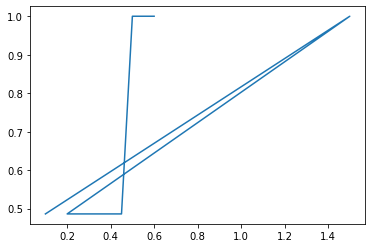

In [59]:
import matplotlib.pyplot as plt 
plt.plot(deltas, errors)